<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2024/blob/main/1-notebooks/chapter-08-02.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Deep Learning in Unsupervised Learning

## Generative AI

- In recent years, generative models based on deep learning have attracted increasing attention, thanks to remarkable advancements in the domain. Leveraging vast datasets, meticulously crafted network structures, and sophisticated training methods, these deep generative models have demonstrated an extraordinary capacity for generating highly realistic content across different forms, including images, text, and audio. 

- Within the realm of these deep generative models, two primary categories emerge as particularly noteworthy: **Generative Adversarial Networks (GANs)** and **Variational Autoencoders (VAEs)**, each meriting special focus for their contributions and capabilities.

## Variational Autoencoders

### Definition

- Variational Autoencoders (VAEs) represent a groundbreaking approach in the field of generative models, offering a unique blend of deep learning and Bayesian inference to generate new data samples that are similar to the input data. 

- Unlike traditional autoencoders, which aim to encode an input into a lower-dimensional space and then reconstruct it back to its original form, VAEs introduce a probabilistic twist to this process, enabling the generation of new data points.

<center>
    
<img src="./pics/ch-08-02-00.jpg" width="500" height="500">
</center>

### Structure

- A VAE consists of two main components: the encoder and the decoder, just like a traditional autoencoder. 

- However, the encoder in a VAE, also known as the recognition model, ***maps inputs to a distribution over the latent space rather than a single point***. 

- This distribution is typically assumed to be Gaussian, characterized by a mean and a variance. 

- The decoder, also referred to as the generative model, then samples points from this distribution and attempts to reconstruct the input data from these samples.

<center>
    
<img src="./pics/ch-08-02-01.jpg">
</center>

*image source: Rocca J. see References and Credits Section*

### Functioning

1. **Encoding**: The encoder takes an input $x$ and transforms it into two parameters in a latent space, $\mu$ and $\sigma^2$, which represent the mean and variance of a Gaussian distribution. This step introduces the element of probabilistic inference, as instead of encoding an input as a single point, it is encoded as a distribution over possible points.

2. **Reparameterization Trick**: To enable backpropagation through random sampling, the VAE employs the so called reparameterization trick. Instead of sampling $z$ directly from the Gaussian distribution defined by $\mu$ and $\sigma^2$, the model samples $\epsilon$ from a standard Gaussian, and then $z$ is computed as $z = \mu + \sigma \odot \epsilon$. This trick allows the gradient of the loss function to be backpropagated through the encoder.

3. **Decoding**: The sampled latent variable $z$ is then passed to the decoder, which generates a reconstruction $\hat{x}$ of the original input $x$. The goal of the decoder is to learn a distribution $p(x|z)$ over the possible inputs $x$ given a latent representation $z$.

<center>
    
<img src="./pics/ch-08-02-02.jpg">
</center>

*image source: Rocca J. see References and Credits Section*

- As we have seen, in practice, the encoded distributions are chosen to be normal so that the encoder can be trained to return the mean and the covariance matrix that describe these Gaussians. 

- The reason why an input is encoded as a distribution with some variance instead of a single point is that it makes possible to express very naturally the latent space regularisation: the distributions returned by the encoder are enforced to be close to a standard normal distribution.

### Training and Loss Function

Thus, the loss function that is minimised when training a VAE is composed of a “reconstruction term” (on the final layer), that tends to make the encoding-decoding scheme as performant as possible, and a “regularisation term” (on the latent layer), that tends to regularise the organisation of the latent space by making the distributions returned by the encoder close to a standard normal distribution.:

- **Reconstruction Loss**: This measures how well the reconstructed data $\hat{x}$ matches the original data $x$. It ensures that the decoder learns to accurately reconstruct the input from the latent variables. A common choice for this loss is the Mean Squared Error (MSE) for continuous data or Binary Cross-Entropy for binary data.

- **KL Divergence**: This term acts as a regularizer, ensuring that the distribution learned by the encoder ( $q(z|x)$ ) is similar to the prior distribution of the latent variables, typically assumed to be a standard Gaussian $p(z)$. The Kullback-Leibler (KL) divergence measures the difference between these two distributions. We can notice that the Kullback-Leibler divergence between two Gaussian distributions has a closed form that can be directly expressed in terms of the means and the covariance matrices of the the two distributions.

**Calculation of the KL Divergence**

The calculation of the Kullback-Leibler (KL) divergence is a crucial part of training variational autoencoders (VAEs) since It measures the discrepancy between two probability distributions. In the context of VAEs, it's used to ensure that the distribution of latent variables learned by the encoder network is close to a predefined distribution, typically a standard normal distribution. The KL divergence between two probability distributions $ P $ and $ Q $ is defined as:

$$ D_{KL}(P || Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)} $$

However, in the case of VAEs, we typically deal with multivariate Gaussian distributions. If we consider $ P $ as the distribution learned by the encoder (latent space distribution) and $ Q $ as the standard normal distribution, the KL divergence can be expressed analytically:

$$D_{KL}(q(z|x)||p(z)) = \frac{1}{2} \sum_{i=1}^{N}(1 + \log(\sigma_i^2) - \mu_i^2 - \sigma_i^2)$$

Where:
- $q(z|x)$ is the approximate posterior distribution (encoder output).
- $p(z)$ is the prior distribution (often chosen to be a standard normal distribution).
- $\mu_i$ and $\sigma_i^2$ are the mean and variance of the approximate posterior distribution respectively.

<center>
    
<img src="./pics/ch-08-02-03.jpg">
</center>

*image source: Rocca J. see References and Credits Section*

### Applications

VAEs have a wide range of applications in the field of generative modeling, including but not limited to:

- **Image Generation**: VAEs can generate new images that resemble the training set, useful in art, design, and entertainment.
- **Anomaly Detection**: By learning to reconstruct normal data, VAEs can be used to detect anomalies or outliers in datasets.
- **Data Augmentation**: VAEs can create new data samples for training machine learning models, especially useful in scenarios where data is scarce.
- **Dimensionality Reduction**: Similar to PCA or t-SNE, VAEs can be used for dimensionality reduction, providing a way to visualize high-dimensional data in lower-dimensional spaces.

### Implementation of a Simple Variational Autoencoder using Keras

The following code defines and trains a Variational Autoencoder (VAE) using TensorFlow and Keras. A VAE is a generative model that learns to encode inputs into a latent space and then decode from this space to reconstruct the inputs. It's particularly useful for tasks like unsupervised learning of complex distributions, dimensionality reduction, and generative tasks. Here, the VAE is applied to the MNIST dataset, which consists of 28x28 pixel grayscale images of handwritten digits (0 through 9).

**Import Libraries**

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

**Define VAE Architecture**

In [2]:
latent_dim = 2

***latent_dim*** is the dimensionality of the latent space. A smaller dimension forces the model to learn a more compact representation of the data.

**Encoder**

Now we define an encoder network using Convolutional Neural Network (CNN) layers to map input images (28x28 grayscale) to a latent space representation. The encoder consists of two convolutional layers followed by flattening and two dense layers to compute both the mean and the log variance of the latent space. The encoder model takes input images and outputs the mean and log variance vectors, representing the parameters of a Gaussian distribution in the latent space.

In [3]:
# Defining the input shape for the encoder network, which is a 28x28 grayscale image
encoder_inputs = keras.Input(shape=(28, 28, 1))

# Adding the first convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation function, 
# a stride of 2, and padding to maintain the input size
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)

# Adding the second convolutional layer with 64 filters, a kernel size of 3x3, ReLU activation function, 
# a stride of 2, and padding to maintain the input size
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)

# Flattening the output from the convolutional layers to prepare for the dense layers
x = layers.Flatten()(x)

# Creating the mean of the latent space representation using a dense layer
# The size of the dense layer is defined by the variable latent_dim
z_mean = layers.Dense(latent_dim, name="z_mean")(x)

# Creating the log variance of the latent space representation using another dense layer
# The size of the dense layer is also defined by the variable latent_dim
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Creating the encoder model that maps input images to both mean and log variance
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d[0][0]']              
                                                                                                  
 flatten (Flatten)           (None, 3136)                 0         ['conv2d_1[0][0]']            
                                                                                            

**Reparametrization Trick**

The purpose of the following user defined function is to implement the reparameterization trick, which enables the VAE to backpropagate gradients through the stochastic sampling process during training. 

Explanation:
1. The `args` parameter consists of two tensors, `z_mean` and `z_log_var`, representing the mean and log variance vectors of the latent space distribution for a batch of input samples.
2. The batch size (`batch`) and dimensionality of the latent space (`dim`) are determined dynamically from the shape of `z_mean`.
3. Random noise (`epsilon`) is sampled from a Gaussian distribution with mean 0 and standard deviation 1. This noise has the same shape as `z_mean`.
4. The reparameterization trick is applied to sample from the latent space distribution. It involves adding a random perturbation (`epsilon`) scaled by the standard deviation (square root of the variance, computed as `exp(0.5 * z_log_var)`) to the mean (`z_mean`). This operation ensures that the sampling process is differentiable, allowing gradients to flow through the network during training.
5. The sampled vector is returned as the output of the function.

In [4]:
# Defining a function for sampling from the latent space in the context of a Variational Autoencoder (VAE)
# This function takes the mean and log variance of the latent space as input arguments
def sampling(args):
    # Unpacking the input arguments
    z_mean, z_log_var = args
    
    # Determining the batch size dynamically
    batch = tf.shape(z_mean)[0]
    
    # Determining the dimensionality of the latent space dynamically
    dim = tf.shape(z_mean)[1]
    
    # Generating random noise from a Gaussian distribution with mean 0 and standard deviation 1
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    
    # Reparameterization trick: sampling from the learned distribution in the latent space
    # The sampled vector is computed as the mean plus a random perturbation scaled by the standard deviation
    # The scaling ensures that the perturbation respects the learned variance
    sampled_vector = z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
    # Returning the sampled vector
    return sampled_vector

The line:

In [5]:
z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

utilizes the `Lambda` layer in Keras to apply the custom `sampling` function as part of the model's computation graph. Let's break down the components and the significance of this line within the context of a Variational Autoencoder (VAE):

*Lambda Layer*

- **`layers.Lambda`**: This is a way to wrap arbitrary expressions as a Layer object in the Keras model. The Lambda layer is used for executing arbitrary code while building Keras models. It's particularly useful for operations that don't require learning weights.

*Sampling Function*

- **`sampling`**: This refers to the custom function defined earlier in the code. The sampling function takes the mean (`z_mean`) and log variance (`z_log_var`) of the latent variables as inputs to generate a sample from the latent distribution. This sampling involves adding stochasticity to the model, enabling the VAE to generate diverse outputs from the latent space.

*Inputs to the Lambda Layer*

- **`([z_mean, z_log_var])`**: These are the inputs to the Lambda layer, specifically the outputs from the encoder model that represent the parameters (mean and log variance) of the Gaussian distribution in the latent space. By providing these as inputs to the `Lambda` layer, the `sampling` function can use them to generate a sample `z` from the latent space.

*Output of the Lambda Layer*

- **`output_shape=(latent_dim,)`**: This specifies the shape of the output from the Lambda layer, which is the shape of the latent space vector `z`. Since `latent_dim` is set to 2, this means each sample `z` from the latent space will be a 2-dimensional vector.

*Purpose in the VAE*

The purpose of this line in the VAE is crucial:
- It bridges the encoder and decoder by generating a latent vector `z` that is sampled from the distribution defined by the encoder's output (`z_mean` and `z_log_var`). This introduces the variational aspect of the VAE, as the model learns to encode inputs into a distribution over the latent space rather than a fixed point. The randomness introduced by the sampling is essential for the generative process, allowing the model not only to reconstruct inputs but also to generate new data after training.

This approach allows the VAE to effectively learn a probabilistic mapping from the input space to the latent space and back, facilitating the generation of new samples that are similar to the input data by decoding points sampled from the latent space distribution.

**Decoder**

In [6]:
# Define an input layer for the latent space with the specified dimensionality
latent_inputs = keras.Input(shape=(latent_dim,))

# Apply a fully connected (dense) layer to the latent inputs to expand them to 
# the size required for the convolutional layers
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)

# Reshape the flattened output from the dense layer into a 3D tensor
x = layers.Reshape((7, 7, 64))(x)

# Apply a transposed convolutional layer to upsample the feature map
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)

# Apply another transposed convolutional layer for further upsampling
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)

# Apply a final transposed convolutional layer to generate the output image
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

# Create the decoder model that maps latent space inputs to output images
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 64)        36928     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 32)        18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 28, 28, 1)         289 

**VAE Model**

The VAE model combines the encoder and decoder. The encoder inputs are passed through the encoder to get the latent space parameters, which are then sampled and decoded to produce the output images.

In [7]:
# VAE model
outputs = decoder(z)
vae = keras.Model(encoder_inputs, outputs, name="vae")
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d[0][0]']              
                                                                                                  
 flatten (Flatten)           (None, 3136)                 0         ['conv2d_1[0][0]']            
                                                                                                

**Loss Function**

The loss function combines reconstruction loss (to ensure the output images match the input images) and KL divergence (to regularize the latent space). The KL divergence encourages the latent space to approximate a standard normal distribution.

In the context of the our code, the calculation of the KL divergence breaks down as follows:

1. `kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)`: This line computes the terms inside the KL divergence formula, using the log-variance (`z_log_var`) and mean (`z_mean`) vectors obtained from the encoder network.

2. `kl_loss = tf.reduce_mean(kl_loss)`: The computed terms are then averaged over the batch dimension, resulting in a single scalar value representing the mean KL divergence across the entire batch.

3. `kl_loss *= -0.5`: Finally, the result is multiplied by $-0.5$. This scaling factor is applied to match the formula of the KL divergence for Gaussian distributions.

By minimizing the KL divergence term along with the reconstruction loss, the VAE learns to encode input data into a latent space distribution that closely resembles a standard normal distribution, facilitating smooth interpolation and generation of new samples during the decoding process.

In [8]:
# Reconstruction loss calculation using binary crossentropy
reconstruction_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, outputs)

# Scaling the reconstruction loss by the image size
reconstruction_loss *= 28 * 28

# KL divergence loss calculation
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss)
kl_loss *= -0.5

# Total VAE loss, which is the sum of reconstruction loss and KL divergence loss
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

# Add the VAE loss to the VAE model
vae.add_loss(vae_loss)

# Compile the VAE model with Adam optimizer
vae.compile(optimizer="adam")

**Data Load and Model Fitting**

Loads the MNIST dataset, normalizes the images, and reshapes them for the model.
Trains the VAE using the training data for 30 epochs, using a batch size of 128. Validation is performed using the test set.

In [9]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test  = np.expand_dims(x_test, -1).astype("float32") / 255

In [10]:
# Train the VAE
vae.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 61s 126ms/step - loss: 203.6998 - val_loss: 171.6528
Epoch 2/30
469/469 [==============================] - 62s 133ms/step - loss: 164.3828 - val_loss: 160.0325
Epoch 3/30
469/469 [==============================] - 59s 126ms/step - loss: 158.0925 - val_loss: 156.5204
Epoch 4/30
469/469 [==============================] - 62s 132ms/step - loss: 155.7547 - val_loss: 155.0404
Epoch 5/30
469/469 [==============================] - 64s 137ms/step - loss: 154.2621 - val_loss: 153.6919
Epoch 6/30
469/469 [==============================] - 58s 125ms/step - loss: 153.1251 - val_loss: 152.4509
Epoch 7/30
469/469 [==============================] - 58s 125ms/step - loss: 152.3428 - val_loss: 151.9651
Epoch 8/30
469/469 [==============================] - 59s 126ms/step - loss: 151.6717 - val_loss: 151.2855
Epoch 9/30
469/469 [==============================] - 60s 128ms/step - loss: 151.1842 - val_loss: 151.2093
Epoch 10/30
469/469 [================

In [30]:
# Save the network's weights:
vae.save_weights("modelWeights.h5")

1/1 [==============================] - 0s 38ms/step


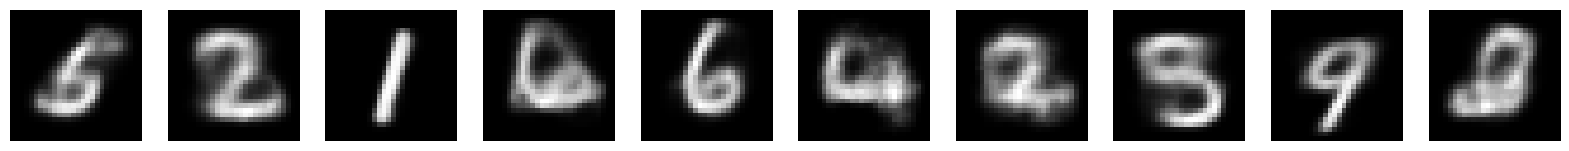

In [31]:
def generate_images(num_images=10):
    # Sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(num_images, latent_dim))
    
    # Decode them to images
    generated_images = decoder.predict(random_latent_vectors)
    
    # Display the generated images
    plt.figure(figsize=(20, 2))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis("off")
    
    plt.savefig('generated_image_02')
    plt.show()

# Generate and display images
generate_images(10)


## References and Credits

[1] - Rocca J. - ["Understanding Variational Autoencoders (VAEs)"](https://medium.com/towards-data-science/understanding-variational-autoencoders-vaes-f70510919f73), Published in Towards Data Science Sep 24, 2019

## Appendix

In [10]:
# Load the original weights:
vae.load_weights("modelWeights.h5")

This function `viz_latent_space` takes an encoder model and data as input. The encoder model is expected to have a method `predict` that can generate predictions from input data. It then extracts the mean (`mu`) of the latent space representation from the encoder's predictions. It visualizes this latent space by creating a scatter plot where each point represents a data instance projected into a 2-dimensional latent space. The color of each point is determined by the corresponding target data. Finally, it displays the plot.

In [11]:
def viz_latent_space(encoder, data):
    """
    Visualizes the latent space representation of input data using the encoder model.

    Parameters:
        encoder (keras.Model): Encoder model that maps input data to latent space.
        data (tuple): Tuple containing input data and corresponding target data.

    Returns:
        None
    """
    # Unpack input and target data
    input_data, target_data = data
    
    # Predict the mean and other latent variables from the encoder model
    #mu, _, _ = encoder.predict(input_data)
    mu, _ = encoder.predict(input_data, verbose=0)
    
    # Create a scatter plot of the latent space, with colors representing target data
    plt.figure(figsize=(8, 10))
    plt.scatter(mu[:, 0], mu[:, 1], c=target_data)
    
    # Label the axes
    plt.xlabel('z - dim 1')
    plt.ylabel('z - dim 2')
    
    # Add color bar to the plot for reference of target values
    plt.colorbar()
    
    # Display the plot
    plt.show()


In [12]:
img_width, img_height = x_train.shape[1], x_train.shape[2]
num_channels = 1
print(img_width, img_height)

28 28


(-0.5, 27.5, 27.5, -0.5)

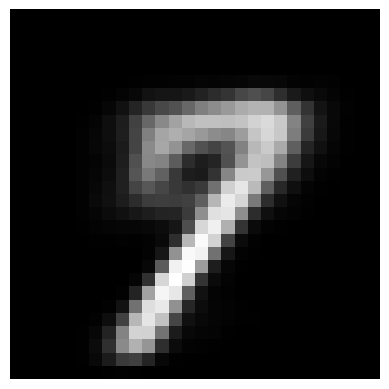

In [15]:
z_sample = np.array([[-1, 0]])
# Decode the latent sample into an image using the decoder model
x_decoded = decoder.predict(z_sample, verbose=0)
# Reshape the decoded image to its original dimensions
digit = x_decoded[0].reshape(img_width, img_height, num_channels)
plt.imshow(digit.reshape(28, 28), cmap='gray')
plt.axis("off")

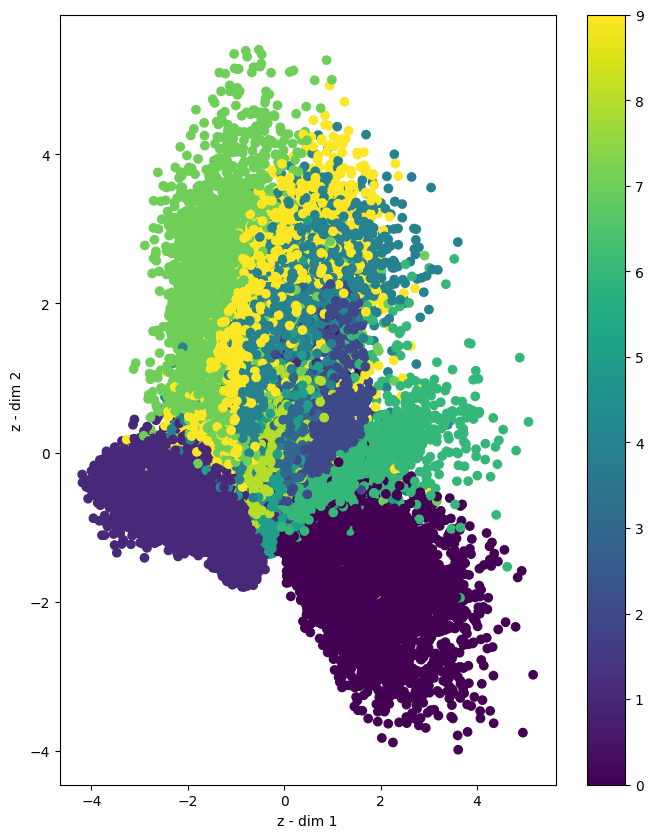

In [16]:
data = (x_train, y_train)

viz_latent_space(encoder, data)

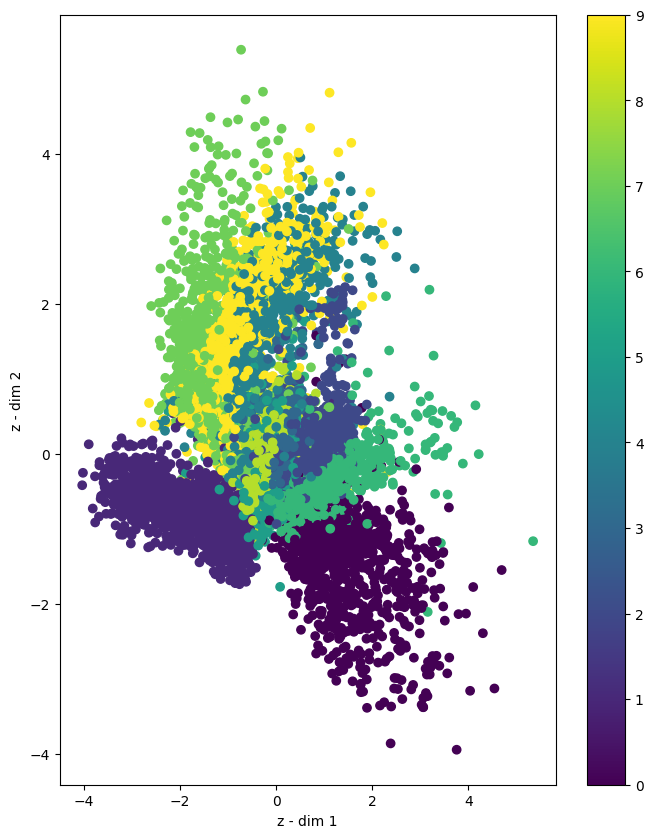

In [17]:
data = (x_test, y_test)

viz_latent_space(encoder, data)

In [18]:
def viz_decoded(encoder, decoder, data):
    # Define the number of samples per dimension in the grid
    num_samples = 15
    # Initialize an array to hold the grid of images, setting its size based on the number of samples and each image's dimensions
    figure = np.zeros((img_width * num_samples, img_height * num_samples, num_channels))
    # Create a linear space for the x dimension of the latent variables, intended for sampling
    grid_x = np.linspace(-4, 4, num_samples)
    # Create a linear space for the y dimension of the latent variables inverted to display correctly in the plot
    grid_y = np.linspace(-4, 4, num_samples)[::-1]
    # Loop over each point in the grid (latent space)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            # Prepare a latent space sample for the current grid point
            z_sample = np.array([[xi, yi]])
            # Decode the latent sample into an image using the decoder model
            x_decoded = decoder.predict(z_sample, verbose=0)
            # Reshape the decoded image to its original dimensions
            digit = x_decoded[0].reshape(img_width, img_height, num_channels)
            # Place the decoded image in the appropriate position on the grid
            figure[i * img_width: (i + 1) * img_width,
                   j * img_height: (j + 1) * img_height] = digit
    # Create a plot with specified figure size
    plt.figure(figsize=(10, 10))
    # Calculate starting and ending ranges for the ticks on the axes
    start_range = img_width // 2
    end_range = num_samples * img_width + start_range + 1

    # Create a range for pixel values to set x-ticks
    # Instead of calculating end_range with img_width, directly use num_samples to ensure alignment
    # This step calculates the positions for ticks to align them with the center of each image in the grid
    pixel_range = np.linspace(start_range, start_range + num_samples * img_width, num_samples)
    
    # Round the grid values for labelling ticks on the x-axis
    sample_range_x = np.round(grid_x, 1)
    # Round the grid values for labelling ticks on the y-axis
    sample_range_y = np.round(grid_y, 1)
    # Use these lines to set the x and y ticks
    # Set the x-ticks with the rounded grid values
    plt.xticks(pixel_range, sample_range_x)
    # Set the y-ticks with the rounded grid values
    #plt.yticks(pixel_range[::-1], sample_range_y) # Ensure y-ticks go from top to bottom
    plt.yticks(pixel_range, sample_range_y) # Ensure y-ticks go from top to bottom
    
    # Label the x-axis to indicate it represents the first dimension of the latent space
    plt.xlabel('z - dim 1')
    # Label the y-axis to indicate it represents the second dimension of the latent space
    plt.ylabel('z - dim 2')
    # Check if the images are grayscale (1 channel) and reshape the array for plotting if necessary
    fig_shape = np.shape(figure)
    if fig_shape[2] == 1:
        figure = figure.reshape((fig_shape[0], fig_shape[1]))
    # Display the grid of images
    plt.imshow(figure)
    # Show the plot
    plt.show()

**Function Definition**
- `viz_decoded(encoder, decoder, data)`: This function visualizes the decoded images from a given encoder and decoder model pair. Specifically, it generates a grid of images decoded from sampled points in the latent space. The purpose is to see how changes in the latent variables correspond to changes in the generated images. It provides insight into how the VAE has learned to represent and generate data and helps in interpreting the continuous nature of the latent space and how different dimensions influence the generated outputs.

**Initialization**
- `num_samples = 15`: Sets the number of samples along each dimension of the grid in the latent space.
- `figure = np.zeros((img_width * num_samples, img_height * num_samples, num_channels))`: Initializes a blank image array to hold the grid of decoded images. The dimensions are determined by the number of samples, the dimensions of each image (`img_width`, `img_height`), and the number of color channels (`num_channels`).

**Generating a Grid in the Latent Space**
- `grid_x` and `grid_y` are created using `np.linspace(-4, 4, num_samples)`, generating linearly spaced values between -4 and 4 for each axis of the latent space. This range is typical for visualizing VAEs as it often encapsulates significant variations. The `[::-1]` on `grid_y` inverts the array to ensure the y-axis goes from top to bottom.

**Decoding and Arranging Images**
- The nested `for` loops iterate over each point `(xi, yi)` in the latent space grid.
- `z_sample = np.array([[xi, yi]])`: Prepares a latent space sample.
- `x_decoded = decoder.predict(z_sample)`: Decodes the latent sample into an image.
- `digit = x_decoded[0].reshape(img_width, img_height, num_channels)`: Reshapes the decoded image to its original dimensions.
- The decoded image is placed into the appropriate location in the `figure` array, creating a grid of images corresponding to the latent space coordinates.

**Visualization**
- `plt.figure(figsize=(10, 10))`: Creates a figure for plotting.
- The next few lines calculate the positions and labels for the ticks on both axes to correspond to the latent space coordinates.
- `plt.xlabel('z - dim 1')` and `plt.ylabel('z - dim 2')`: Label the axes to indicate they represent dimensions in the latent space.
- The check for `if fig_shape[2] == 1:` is to ensure compatibility with `plt.imshow()`, which expects either a 2D array for grayscale images or a 3D array with 3 (RGB) or 4 (RGBA) channels. If there's only one channel, the array is reshaped to 2D.
- `plt.imshow(figure)`: Displays the grid of images.
- `plt.show()`: Renders the plot.

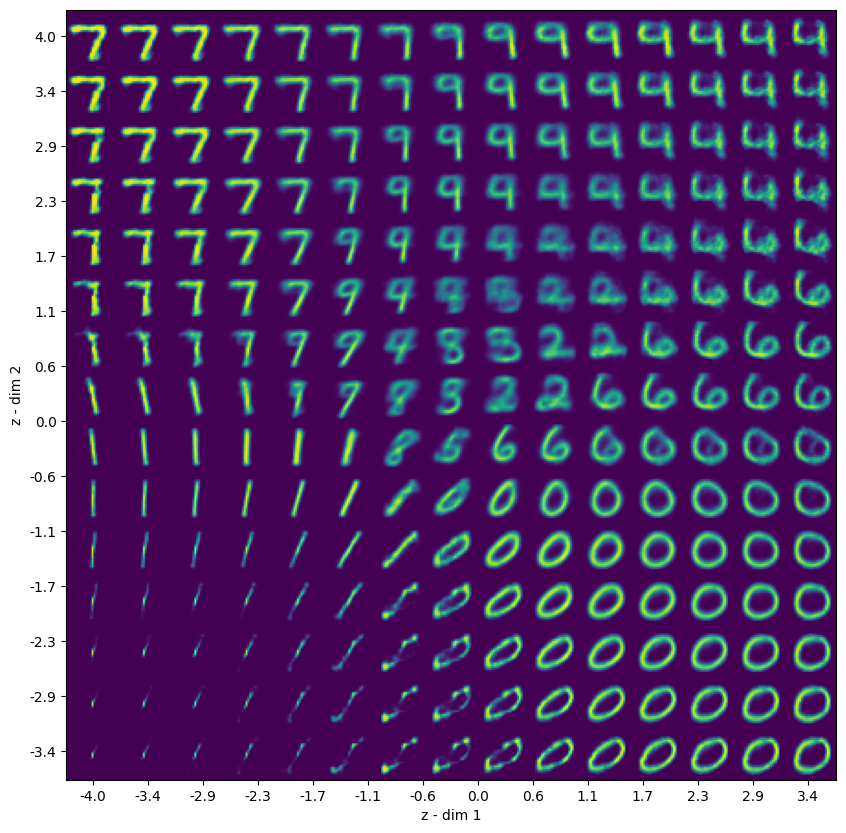

In [20]:
viz_decoded(encoder, decoder, data)